# Практическое задание № 1. Классификация

**Работу выполнил:**

Дженжеруха Кирилл Андреевич, ИТМО ID: 368103


# Распознавание активности человека на основе данных с мобильных сенсоров: описание задания


Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных


Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).

Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.

# Импорт библиотек

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Считывание и анализ набора данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков *(feature extraction)*, в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков *(feature engineering)*, это весьма трудоемкая и творческая задача.

In [ ]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('/content/drive/MyDrive/AAI_MobileActivitySensors', 'train.csv') #/content/train.csv
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [ ]:
def load_dataset(path, label_dict):
    train_X = read_data(path, 'train.csv').values[:,:-2]
    train_y = read_data(path, 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data(path, 'test.csv').values[:,:-2]
    test_y = read_data(path, 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset('/content/drive/MyDrive/AAI_MobileActivitySensors', label_dict)

In [ ]:
activity = df['Activity'].tolist()

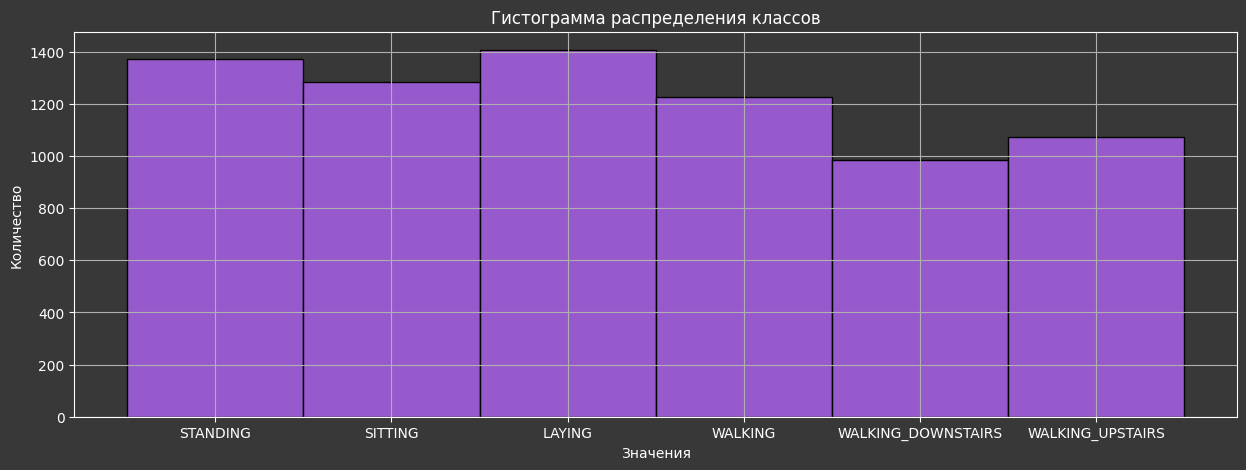

In [ ]:
#@title Код для отрисовки гистограммы

fig1 = plt.figure(figsize=(15, 5), facecolor='#383838')
ax1 = plt.subplot(1, 1, 1)
sns.histplot(activity, color='#b866ff')

# ax1 params
ax1.set_title('Гистограмма распределения классов', color='w')
ax1.set_xlabel('Значения', color='w')
ax1.set_ylabel('Количество', color='w')
ax1.set_facecolor('#383838')
ax1.spines['top'].set_color('w')
ax1.spines['bottom'].set_color('w')
ax1.spines['left'].set_color('w')
ax1.spines['right'].set_color('w')
ax1.xaxis.set_tick_params(colors='w')
ax1.yaxis.set_tick_params(colors='w')
ax1.xaxis.label.set_color('w')
ax1.yaxis.label.set_color('w')
plt.grid(True)

# Выбор моделей

In [ ]:
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as Bayes
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.linear_model import SGDClassifier as SGD

Опишите вашу мотивацию по выбору модели. Какие гиперпараметры есть у выбранной вами модели? За что они отвечают? На что влияют?

# Обучение и оценка моделей

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix # импорт инструментов оценки
from sklearn.metrics import accuracy_score, f1_score
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']



## Логистическая регрессия / Logistic Regression



**Логистическая регрессия** – модель классификации, использующая сигмоидную функцию $$\operatorname{sig}(t) = \displaystyle \frac{1}{1+e^{-t}}$$ для того чтобы значения на выходе варьировались строго от 0 до 1.

In [ ]:
model_LogR = LogR(C=25, solver='lbfgs', max_iter=150) # Logistic Regression
model_LogR.fit(train_X, train_y) # обучение модели

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=25, max_iter=150)

In [ ]:
yhat_LogR = model_LogR.predict(test_X) # предикт модели
yhat_LogR

array([4, 4, 4, ..., 1, 1, 1])

In [ ]:
# оценка модели
print(classification_report(test_y, yhat_LogR, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.93      1.00      0.96       496
  Walking Upstairs       0.98      0.92      0.95       471
Walking Downstairs       1.00      0.97      0.98       420
           Sitting       0.98      0.88      0.93       491
          Standing       0.90      0.98      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



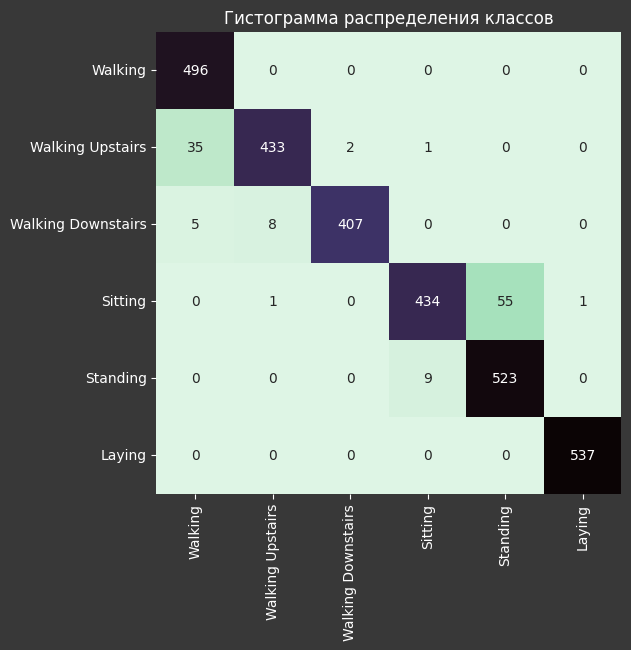

In [ ]:
#@title Код построения Confusion Matrix

fig = plt.figure(figsize=(6, 6), facecolor='#383838')
ax1 = plt.subplot(1, 1, 1)
sns.heatmap(
    confusion_matrix(test_y, yhat_LogR),
    cmap='mako_r',
    annot=True,
    fmt='.3g',
    cbar=False,
    xticklabels=target_names,
    yticklabels=target_names
    )

# ax1 params
ax1.set_title('Гистограмма распределения классов', color='w')
ax1.set_facecolor('#383838')
ax1.spines['top'].set_color('w')
ax1.spines['bottom'].set_color('w')
ax1.spines['left'].set_color('w')
ax1.spines['right'].set_color('w')
ax1.xaxis.set_tick_params(colors='w')
ax1.yaxis.set_tick_params(colors='w')
ax1.xaxis.label.set_color('w')
ax1.yaxis.label.set_color('w')

## k ближайших соседей / k-Nearest Neighbors

**kNN** – алгоритм классификации и регрессии, основанный на том, что анализируется расстояние между точками и по гипотезе компактности предполагается, что ближайшие группы объектов в пространстве признаков либо принадлежат к одному классу, либо имеют схожие значения целевой переменной.

In [ ]:
model_KNN = KNN(n_neighbors=15, weights='distance', metric='manhattan') # K-Nearest Neighbors
model_KNN.fit(train_X, train_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

In [ ]:
yhat_KNN = model_KNN.predict(test_X)
yhat_KNN

array([4, 4, 4, ..., 1, 1, 0])

In [ ]:
# оценка модели
print(classification_report(test_y, yhat_KNN, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.86      0.98      0.92       496
  Walking Upstairs       0.88      0.91      0.89       471
Walking Downstairs       0.98      0.78      0.87       420
           Sitting       0.97      0.82      0.89       491
          Standing       0.86      0.98      0.91       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.92      0.92      2947



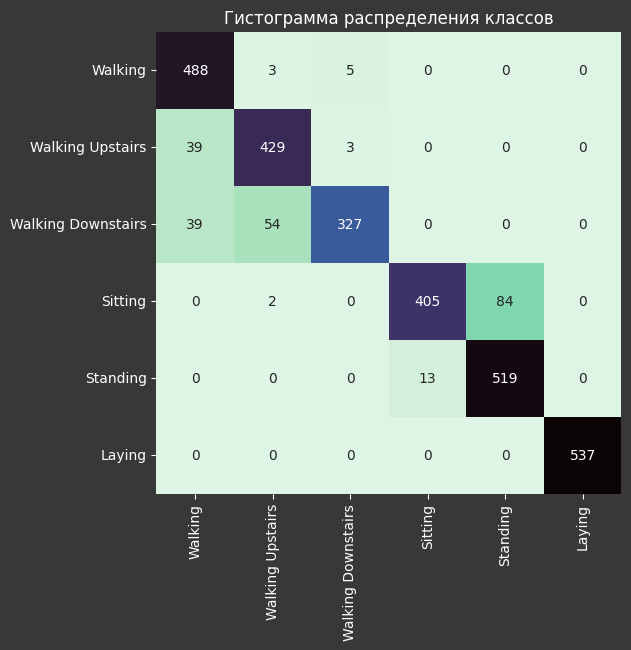

In [ ]:
#@title Код построения Confusion Matrix

fig = plt.figure(figsize=(6, 6), facecolor='#383838')
ax1 = plt.subplot(1, 1, 1)
sns.heatmap(
    confusion_matrix(test_y, yhat_KNN),
    cmap='mako_r',
    annot=True,
    fmt='.3g',
    cbar=False,
    xticklabels=target_names,
    yticklabels=target_names
    )

# ax1 params
ax1.set_title('Гистограмма распределения классов', color='w')
ax1.set_facecolor('#383838')
ax1.spines['top'].set_color('w')
ax1.spines['bottom'].set_color('w')
ax1.spines['left'].set_color('w')
ax1.spines['right'].set_color('w')
ax1.xaxis.set_tick_params(colors='w')
ax1.yaxis.set_tick_params(colors='w')
ax1.xaxis.label.set_color('w')
ax1.yaxis.label.set_color('w')

## Наивный байесовский классификатор / Naive Bayes Classifier

**Наивный байесовский классификатор** – классификатор, основанный на теореме Байеса $$P(A|B) = \displaystyle \frac{P(B|A)P(A)}{P(B)}$$ со строгим (наивным) предположением о независимости признаков между собой при фиксированном классе. Анализируется набор одномерных плотностей вместо многомерной плотности, что облегчает работу алгоритма.

In [ ]:
model_Bayes = Bayes() # Naive Bayes Classifier
model_Bayes.fit(train_X, train_y)

GaussianNB()

In [ ]:
yhat_Bayes = model_Bayes.predict(test_X)
yhat_Bayes

array([4, 4, 4, ..., 1, 1, 1])

In [ ]:
# оценка модели
print(classification_report(test_y, yhat_Bayes, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.82      0.84      0.83       496
  Walking Upstairs       0.76      0.96      0.84       471
Walking Downstairs       0.83      0.61      0.70       420
           Sitting       0.58      0.75      0.65       491
          Standing       0.80      0.86      0.83       532
            Laying       0.96      0.60      0.74       537

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947



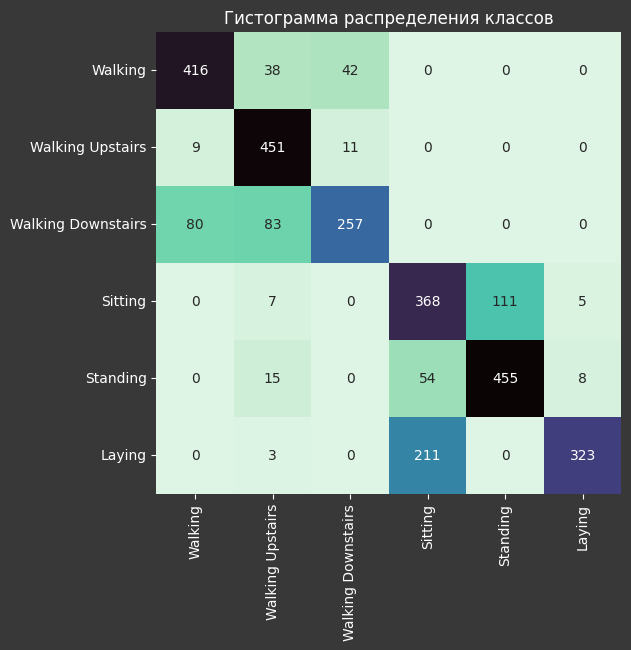

In [ ]:
#@title Код построения Confusion Matrix

fig = plt.figure(figsize=(6, 6), facecolor='#383838')
ax1 = plt.subplot(1, 1, 1)
sns.heatmap(
    confusion_matrix(test_y, yhat_Bayes),
    cmap='mako_r',
    annot=True,
    fmt='.3g',
    cbar=False,
    xticklabels=target_names,
    yticklabels=target_names
    )

# ax1 params
ax1.set_title('Гистограмма распределения классов', color='w')
ax1.set_facecolor('#383838')
ax1.spines['top'].set_color('w')
ax1.spines['bottom'].set_color('w')
ax1.spines['left'].set_color('w')
ax1.spines['right'].set_color('w')
ax1.xaxis.set_tick_params(colors='w')
ax1.yaxis.set_tick_params(colors='w')
ax1.xaxis.label.set_color('w')
ax1.yaxis.label.set_color('w')

## Дерево решений / Decision Tree

**Дерево решений** – древовидный алгоритм классификации, работающий по принципу "Если …, то …". За счет обучающего множества правила генерируются автоматически в процессе обучения.

In [ ]:
model_DTree = DTree(criterion='entropy', max_depth=5, min_samples_split=5) # Decision Tree
model_DTree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [ ]:
yhat_DTree = model_DTree.predict(test_X)
yhat_DTree

array([4, 4, 4, ..., 1, 0, 0])

In [ ]:
# оценка модели
print(classification_report(test_y, yhat_DTree, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.81      0.94      0.87       496
  Walking Upstairs       0.83      0.74      0.78       471
Walking Downstairs       0.84      0.79      0.81       420
           Sitting       0.91      0.71      0.79       491
          Standing       0.78      0.93      0.85       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.86      0.85      0.85      2947
      weighted avg       0.86      0.86      0.85      2947



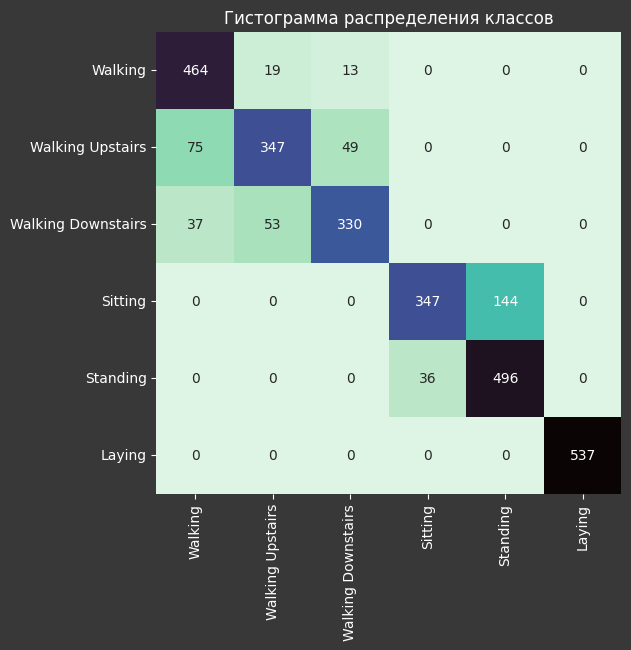

In [ ]:
#@title Код построения Confusion Matrix

fig = plt.figure(figsize=(6, 6), facecolor='#383838')
ax1 = plt.subplot(1, 1, 1)
sns.heatmap(
    confusion_matrix(test_y, yhat_DTree),
    cmap='mako_r',
    annot=True,
    fmt='.3g',
    cbar=False,
    xticklabels=target_names,
    yticklabels=target_names
    )

# ax1 params
ax1.set_title('Гистограмма распределения классов', color='w')
ax1.set_facecolor('#383838')
ax1.spines['top'].set_color('w')
ax1.spines['bottom'].set_color('w')
ax1.spines['left'].set_color('w')
ax1.spines['right'].set_color('w')
ax1.xaxis.set_tick_params(colors='w')
ax1.yaxis.set_tick_params(colors='w')
ax1.xaxis.label.set_color('w')
ax1.yaxis.label.set_color('w')

## Стохастический градиентный спуск / Stochastic Gradient Descent (SGD)

**Стохастический градиентный спуск** – итерационный метод оптимизации целевой функции с подходящейт гладкостью. Отличие в том, что градиент на каждом шаге считается не как сумма градиентов, а как градиент от одного случайно выбранного элемента.

In [ ]:
model_SGD = SGD(loss='log_loss') # Stochastic Gradient Descent
model_SGD.fit(train_X, train_y)

SGDClassifier(loss='log_loss')

In [ ]:
yhat_SGD = model_SGD.predict(test_X)
yhat_SGD

array([4, 4, 4, ..., 1, 1, 1])

In [ ]:
# оценка модели
print(classification_report(test_y, yhat_SGD, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.97      0.99      0.98       496
  Walking Upstairs       0.97      0.97      0.97       471
Walking Downstairs       0.99      0.97      0.98       420
           Sitting       0.99      0.74      0.85       491
          Standing       0.81      0.99      0.89       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.94      0.94      2947
      weighted avg       0.95      0.95      0.94      2947



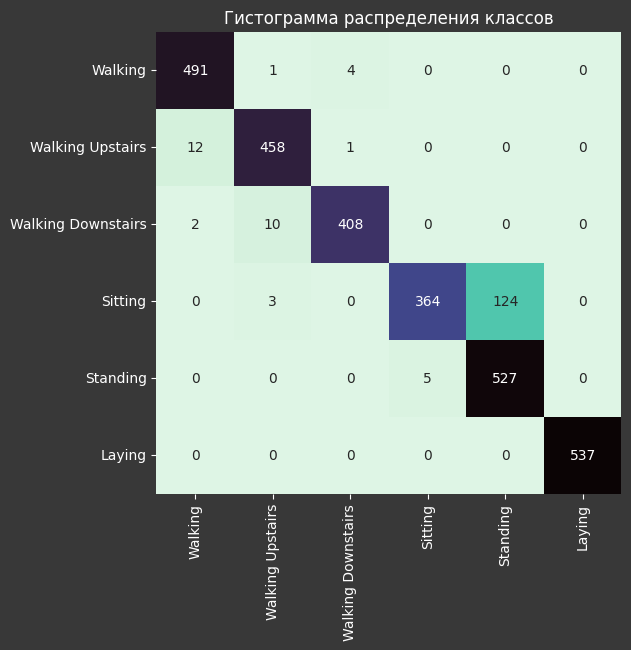

In [ ]:
#@title Код построения Confusion Matrix

fig = plt.figure(figsize=(6, 6), facecolor='#383838')
ax1 = plt.subplot(1, 1, 1)
sns.heatmap(
    confusion_matrix(test_y, yhat_SGD),
    cmap='mako_r',
    annot=True,
    fmt='.3g',
    cbar=False,
    xticklabels=target_names,
    yticklabels=target_names
    )

# ax1 params
ax1.set_title('Гистограмма распределения классов', color='w')
ax1.set_facecolor('#383838')
ax1.spines['top'].set_color('w')
ax1.spines['bottom'].set_color('w')
ax1.spines['left'].set_color('w')
ax1.spines['right'].set_color('w')
ax1.xaxis.set_tick_params(colors='w')
ax1.yaxis.set_tick_params(colors='w')
ax1.xaxis.label.set_color('w')
ax1.yaxis.label.set_color('w')

# Выводы




1. В чем разница между показателями `precision` и `recall`? Что такое показатель `F1`?



*   `precision` (точность) – метрика, показывающая, сколько предсказаний являются верными: $$\operatorname{precision} = \displaystyle \frac{TP}{TP+FP};$$
*   `recall` (полнота) – метрика, показывающая способность модели делать предсказания в принципе: $$\operatorname{recall} = \displaystyle \frac{TP}{TP+FN}.$$

`F1-score` (F1-мера) – среднее гармоническое `precision` и `recall`: $$F_1 = \displaystyle \frac{2 \cdot \operatorname{precision} \cdot \operatorname{recall}}{\operatorname{precision} + \operatorname{recall}}.$$



2. Используйте вариации нескольких моделей с разными гиперпараметрами. Сравните полученный результат (визуализируйте полученный результат).

In [ ]:
accuracy = {'Логистическая регрессия': accuracy_score(test_y, yhat_LogR),
            'k ближайших соседей': accuracy_score(test_y, yhat_KNN),
            'Наивный байесовский классификатор': accuracy_score(test_y, yhat_Bayes),
            'Дерево решений': accuracy_score(test_y, yhat_DTree),
            'Стохастический градиентный спуск': accuracy_score(test_y, yhat_SGD)}

accuracy = dict(sorted(accuracy.items(), key=lambda item: item[1], reverse=True))
print('Accuracy:')
for k, v in accuracy.items():
    print(f'{k}: {round(v, 4)}')

Accuracy:
Логистическая регрессия: 0.9603
Стохастический градиентный спуск: 0.945
k ближайших соседей: 0.9179
Дерево решений: 0.8554
Наивный байесовский классификатор: 0.7703


In [ ]:
F1 = {'Логистическая регрессия': f1_score(test_y, yhat_LogR, average='weighted'),
            'k ближайших соседей': f1_score(test_y, yhat_KNN, average='weighted'),
            'Наивный байесовский классификатор': f1_score(test_y, yhat_Bayes, average='weighted'),
            'Дерево решений': f1_score(test_y, yhat_DTree, average='weighted'),
            'Стохастический градиентный спуск': f1_score(test_y, yhat_SGD, average='weighted')}

F1 = dict(sorted(F1.items(), key=lambda item: item[1], reverse=True))
print('F1-score:')
for k, v in F1.items():
    print(f'{k}: {round(v, 4)}')

F1-score:
Логистическая регрессия: 0.9602
Стохастический градиентный спуск: 0.9441
k ближайших соседей: 0.9169
Дерево решений: 0.8535
Наивный байесовский классификатор: 0.7688


3. Что такое гиперпараметры модели машинного обучения (МО)?

**Гиперпараметры модели МО** – параметры, устанавливаемые при настройке модели до начала обучения. Выбор гиперпараметров обуславливает производительность и скорость обучения модели, ее сложность и т. д.

4. Опишите влияние гиперпараметров в выбранных вами моделях МО.



*   **Логистическая регрессия:**

  1.   `penalty` – тип нормализации (добавление штрафа происходит разными способами – например, добавляются абсолютные значения коэффициентов или сумма их квадратов, умноженная на коэффициент);
  2.   `C` – обратное значение регуляризации (чем меньше значение, тем сильнее регуляризация);
  3.   `solver` – отвечает за выбор алгоритма оптимизации;
  4.   `max_iter` – максимальное количество итераций, которые совершает решатель.

*   **k ближайших соседей:**
  1.   `k` – количество соседей (определяет, сколько ближайших точек учитывать при обучении). Чем меньше, тем модель более гибкая, чем больше, тем более устойчивая к выбросам и шуму;
  2.   `metric` – определяет тип метрики, по которой расчитывается расстояние до соседей;

*   **Дерево решений:**
  1.   `criterion` – определяет, какой признак использовать для разбиения данных;
  2.   `maxDepth` – максимальная "глубина" дерева. Позволяет контролировать сложность модели и избегать переобучения;
  3.   `min_samples_split` – минимальное количество образцов для разделения узла.

*   **Стохастический градиентный спуск:**
  1.   `eta` – шаг обучения, управляет сходимостью метода: при слишком большом шаге получим расходимость метода, при слишком медленном – очень медленную сходимость;
  2.   `loss` – определение типа функции потерь.

